In [1]:
# Checking the version of PYTHON; we only support > 3.5
import sys
if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')
    
# Importing QISKit
import math
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# Import basic plotting tools
from qiskit.tools.visualization import plot_histogram

# Quantum program setup 
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"]) # set the APIToken and API url
q = Q_program.create_quantum_register("q", 5)
c = Q_program.create_classical_register("c", 5)


shor11_15 = Q_program.create_circuit("shor11_15", [q], [c])
shor11_15.h(q[2])
shor11_15.h(q[3])
shor11_15.h(q[4])

shor11_15.cx (q[2],q[1])
shor11_15.cx (q[2],q[0])
shor11_15.h (q[3])
shor11_15.cu1(math.pi/2.0, q[3], q[4])
shor11_15.h (q[4])
shor11_15.cu1(math.pi/4.0, q[3], q[2])
shor11_15.cu1(math.pi/2.0, q[4], q[2])
shor11_15.h (q[2])


for i in range(2,5):
    shor11_15.measure(q[i], c[i])
print(shor11_15.qasm())


OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg c[5];
h q[2];
h q[3];
h q[4];
cx q[2],q[1];
cx q[2],q[0];
h q[3];
cu1(1.570796326794897) q[3],q[4];
h q[4];
cu1(0.785398163397448) q[3],q[2];
cu1(1.570796326794897) q[4],q[2];
h q[2];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];



In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def plot_histogramH(data, number_to_keep=False):
    """Plot a histogram of data.

    data is a dictionary of  {'000': 5, '010': 113, ...}
    number_to_keep is the number of terms to plot and rest is made into a
    single bar called other values
    """
    if number_to_keep is not False:
        data_temp = dict(Counter(data).most_common(number_to_keep))
        data_temp["rest"] = sum(data.values()) - sum(data_temp.values())
        data = data_temp

    labels = sorted(data)
    values = np.array([data[key] for key in labels], dtype=float)
    pvalues = values / sum(values)
    numelem = len(values)
    ind = np.arange(numelem)  # the x locations for the groups
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects = ax.bar(ind, pvalues, width, color='seagreen')
    # add some text for labels, title, and axes ticks
    ax.set_ylabel('Probabilities', fontsize=12)
    ax.set_xticks(ind)
    ax.set_xticklabels(labels, fontsize=12, rotation=70)
    ax.set_ylim([0., min([1.2, max([1.2 * val for val in pvalues])])])
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
                '%4.3f' % float(height),
                ha='center', va='bottom')
    plt.show()


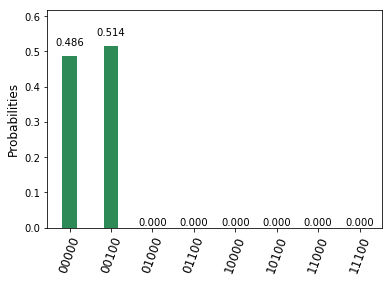

In [7]:
simulate = Q_program.execute(["shor11_15"], backend="local_qasm_simulator", shots=1024)
result = simulate.get_counts("shor11_15")
#plot_histogramH(result)
plot_histogramH({'00000': 486, '00100': 514,'10000': 0,'01000': 0,'01100': 0,'11000': 0,'10100': 0,'11100': 0})

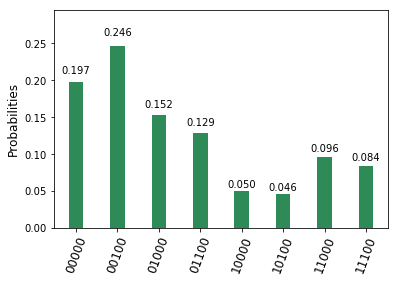

In [8]:
ibmqx_backend = Q_program.get_backend_configuration('ibmqx4')
ibmqx_coupling = ibmqx_backend['coupling_map']

result = Q_program.execute(["shor11_15"], backend="ibmqx4", coupling_map=ibmqx_coupling, shots=1024, max_credits=3, wait=10, timeout=240)
plot_histogramH(result.get_counts("shor11_15"))

In [ ]:
ibmqx_backend = Q_program.get_backend_configuration('ibmqx5')
ibmqx_coupling = ibmqx_backend['coupling_map']

result = Q_program.execute(["shor11_15"], backend="ibmqx5", coupling_map=ibmqx_coupling, shots=1024, max_credits=3, wait=10, timeout=240)
print(result.get_ran_qasm("shor11_15"))
plot_histogramH(result.get_counts("shor11_15"))